Roll No: 213070018


Name: Harsh Diwakar

#Previous Synthesized Vowel



## Generation of X(t)

Approximating location of discrete triangular impulse to closest integer

In [1]:
# Importing Libraries:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:
# Defining function to Find the samples x[n]
def source(Fs, F0, delta_t, sec):
  # for x sec, Number of samples = x *Fs
  x_n = np.zeros(int(sec*Fs))
  # find out strides and N
  st,N = stride(F0,Fs,delta_t)
  # Updating x_n:
  i=0
  while(i< x_n.shape[0]):
    x_n[i:i+N] = st
    i+=N
  
  return x_n


from fractions import Fraction
# Define a function to return the samples and narrow triangular approximation 
# of impulse train
def stride(F0, Fs, delta_t):
  # F0: Fundamental frequency, Fs: Sampling Frequency, delta_t: Width of triangle
  # T0: Fundamental Time period
  T0 = 1/F0
  # Ts: Sampling Time period
  Ts = 1/Fs
  # N: Time period of triangular pulse with respect to Fs
  N = Fraction(Fs,F0).numerator
  # Strides in in (0: N)
  st = np.zeros(N)
  # Defining samples n
  n = np.arange(0,N)
  # time t = nTs
  t = Ts * n
  # k for iteration over iterations
  k=0
  for i in t:
    # cth cycle of signlal with F0
    c= i//T0
    # j time in that time period
    j = i-c*T0
    # Updating strides as triangular wave
    if( j< delta_t/2):
      st[k] =1
    elif(j > (T0-delta_t/2)):
      st[k] = 1
    k = k+ 1
  # Returing strides and N
  return st, N


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.


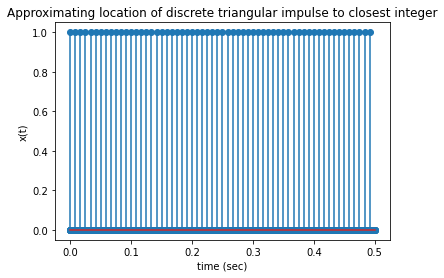

In [3]:
# x[n] 
# F0 = 120
F0 = 120
# Fs = 16000
Fs = 16000
# Finding the samples x[n]
# for 0.5 sec
x_n = np.zeros(int(0.5*Fs))
# delta_t = 1/Fs
x_n = source(Fs, F0, 1/Fs, 0.5)
# Making all impulses amplitude as 1 because that is what we will get after 
# sampling narrow rectangular pulse
#x_n = np.where(x_n>0,1,0)
# Defining n 
n = np.arange(0,x_n.shape[0])

# Plotting x[n]:
plot_x = n/Fs
plot_y = x_n
plt.stem(plot_x,plot_y)
plt.xlabel('time (sec)')
plt.ylabel('x(t)')
plt.title('Approximating location of discrete triangular impulse to closest integer')
plt.show()


## Calculating Response after passing the filter

In [4]:
# Function for second order filter response
def response(x_n, Fi, Bi, Fs):
  r_i = math.exp(-1*Bi*math.pi/Fs)
  theta_i = 2*math.pi*Fi/ Fs
  # a and b for difference equation: 
  # y[n] = ay[n-1]+by[n-2]+x[n]
  a = 2*r_i*math.cos(theta_i)
  b = -1*r_i**2
  # initiate y[n]
  y_n = np.zeros(x_n.shape[0])
  for i in range(0,y_n.shape[0]):
    y_n[i] = a*y_n[i-1]+ b*y_n[i-2]+ x_n[i]

  return y_n

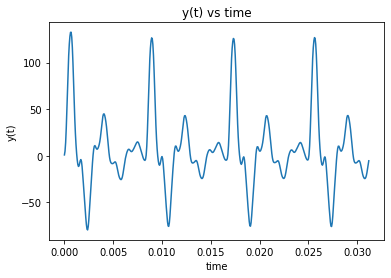

In [5]:
# Applying Filter:
# First formant:
F1 = 300
Bi = 100  # Same Bi for all sections
y1 = response(x_n,F1,Bi,Fs)

# Second Formant:
F2 = 870
Bi = 100 
y2 = response(y1,F2,Bi,Fs)

# Third formant
F3 = 2240
Bi = 100  
y = response(y2,F3,Bi,Fs)

# Plotting y[n] for few pitches
plot_x = n[:500]/Fs
plot_y = y[:500]
plt.plot(plot_x,plot_y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.title('y(t) vs time')
plt.show()

# Assignment 1-b starts here


##Methodologies
Here, I will explian the approach for this assignment.

Assignment Requirements:

1. Use previosly synthesised vowels of $F_0 = 120 Hz$ and  $F_0 = 220 Hz$
2. For formants: F1 = 300 HZ, F2 = 870 Hz, F3 = 2240 Hz (Formants for \u\ sound)
3. Plot magnitude (dB) spectrum using Rectangular and Hamming Windows of lengths: 5ms, 10ms, 20ms, 40ms.
4. Comment on the similarities and differences between the different computed spectra.
5. Estimate the single parameters from each of the magnitude spectra and find the error wrt Ground truth values.

Approach:

- Vowel will be synthesized again for $F_0 = 120 Hz$ and $ F_0 = 220 Hz$
- For computing the DFT we will take a DFT length, N = 1024 because the highest number of samples obtained after using $F_s = 16kHz$, window length = 40ms (highest) will give us 640 samples so taking anything below that will not be a good idea.
- We could've taken DFT size just as equal to the length of window but that may not give us enough samples with less window sizes. We take DFT sizes in powers of 2 because in that way it is computationaly faster.
- For showing the effect of increasing the DFT length, values with higher DFT length are also found out.
- Ground Truth values:
 - $F_0 = 120 Hz$ $F_0 = 220 Hz$
 - F1 = 300 Hz, F2 = 870 Hz, F3 = 2240 Hz
-  Single parameters from each magnitude spectra. We will use spectra with different window size for determining the parameters as:
 - Window Lenght: 5ms, Parameter: F0
 - Window Length: 10ms, Parameter: F0
 - Window Lenght: 20ms, Paramenter: F1,F2 and F3
 - Window Length: 40ms, Paramenter: F1,F2 and F3

 We know from the class lectures that wide band (small window) analysis is performed to find the location of formants and narrow band (large window) analysis is performed to determine the Pitch and harmonics of uttered words.
- For finding the formant locations using wide band analysis we will take value of frequeny at local maximas. That is where we will observe the formant locations we will take the value of frequeny for the highest value in that region.
- For finding the F0 using narrow band analysis, we know that we will have the peaks at each harmonic location. Lobes will now be narrowed and can be clearly seen at the harmonics. We will take the value of peak for the first peak.

- First Coding and plots will be shown along with estimating the values after that discussion and observations are made.


##$F_0 = 120 Hz$

###Generation of Speech signal

We can use above generated signal for our analysis for $F_0 = 120 Hz$

###Rectangular Window

In [6]:
def rect_window(window_size, Fs):
  window_len = int(window_size*Fs)
  return(np.ones(window_len))

#### Window Length = 5 ms

In [7]:
# Code to convert frequency to DFT points
def freq_dft(freq, dft_len = 1024, Fs = 16000):
  step = Fs/dft_len
  return (int(round(freq/step)))


Text(0.5, 1.0, 'Magnitude (dB) spectrum with rectangular window of size 5.0 ms')

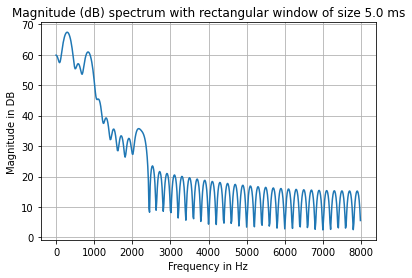

In [8]:
# Create rectangular window of 5ms
Fs = 16000
win_size = 5e-3
window = rect_window(win_size, Fs)
#Applying rectangular window at 2.5 sec and getting V[n]
# for Fs =16000 .25 seconds will come at .25*16000 = 4000 
V_n = y[4000:4000+window.shape[0]]* window
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with rectangular window of size {} ms'.format(win_size*1000))


Text(0.5, 1.0, 'Zoomed view of Magnitude spectrum with rectangular window of size 5.0 ms')

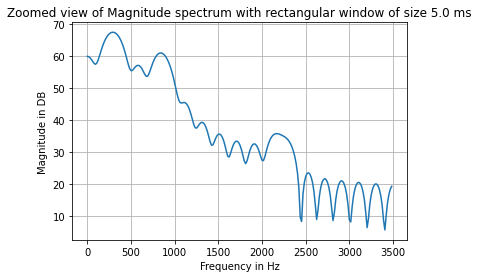

In [9]:
# Zooming out from 0:3500 for clearly seeing formants
f_f = freq_dft(3500)
plt.plot(freq[0:f_f],mag_vk[0:f_f])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Zoomed view of Magnitude spectrum with rectangular window of size {} ms'.format(win_size*1000))

In [10]:
# First formant F1 = 0 Hz, F2 = 500 Hz
f1 = freq_dft(0)
f2 = freq_dft(500)
k = np.argmax(mag_vk[f1:f2])
formant1 = freq[k]

# Second Formant F1 = 500, F2 = 1000 Hz
f1 = freq_dft(500)
f2 = freq_dft(1000)
k = np.argmax(mag_vk[f1:f2])
formant2 = freq[k+f1]

# Third Formant F1 = 2000, F2 = 2500 Hz
f1 = freq_dft(2000)
f2 = freq_dft(2500)
k = np.argmax(mag_vk[f1:f2])
formant3 = freq[k+f1]

# Pandas to store the values.

df = pd.DataFrame({'DFT Length': dft_len, 'F0': 120, 'Window Type': 'Rectangular', 
                   'Window Length (ms)': win_size*1000, 'Observed F0': '-', 'F1': formant1, 'F2': formant2, 'F3': formant3},index = [0])

print('Formants obtained using a window length of {} ms are: '.format(win_size*1000))
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formant1,formant2,formant3))


Formants obtained using a window length of 5.0 ms are: 
 First Formant: 296.875 Hz 
 Second Formant: 843.75 Hz 
 Third Formant: 2171.875 Hz


#### Window Length = 10 ms

Text(0.5, 1.0, 'Magnitude (dB) spectrum with rectangular window of size 10.0 ms')

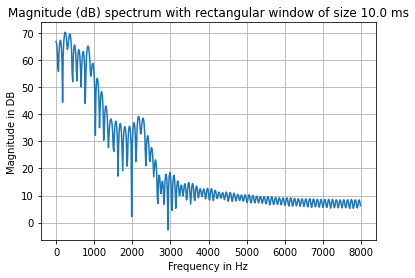

In [11]:
# Create rectangular window of 10ms
Fs = 16000
win_size = 10e-3
window = rect_window(win_size, Fs)
#Applying rectangular window at 2.5 sec and getting V[n]
# for Fs =16000 .25 seconds will come at .25*16000 = 4000 
V_n = y[4000:4000+window.shape[0]]* window
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with rectangular window of size {} ms'.format(win_size*1000))


Text(0.5, 1.0, 'Zoomed view of Magnitude spectrum with rectangular window of size 10.0 ms')

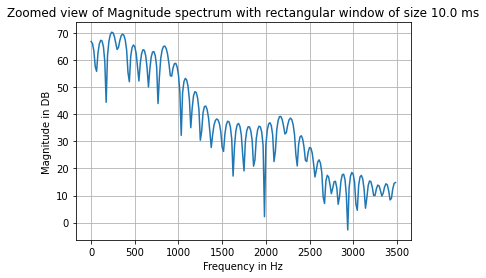

In [12]:
# Zooming out from 0:3500 for clearly seeing formants
f_f = freq_dft(3500)
plt.plot(freq[0:f_f],mag_vk[0:f_f])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Zoomed view of Magnitude spectrum with rectangular window of size {} ms'.format(win_size*1000))

In [13]:
# First formant F1 = 0 Hz, F2 = 500 Hz
f1 = freq_dft(0)
f2 = freq_dft(500)
k = np.argmax(mag_vk[f1:f2])
formant1 = freq[k]

# Second Formant F1 = 500, F2 = 1000 Hz
f1 = freq_dft(500)
f2 = freq_dft(1000)
k = np.argmax(mag_vk[f1:f2])
formant2 = freq[k+f1]

# Third Formant F1 = 2000, F2 = 2500 Hz
f1 = freq_dft(2000)
f2 = freq_dft(2500)
k = np.argmax(mag_vk[f1:f2])
formant3 = freq[k+f1]

new_row = {'DFT Length': dft_len, 'F0': 120, 'Window Type': 'Rectangular', 
                   'Window Length (ms)': win_size*1000, 'Observed F0': '-', 'F1': formant1, 'F2': formant2, 'F3': formant3}
df = df.append(new_row,ignore_index=True)

print('Formants obtained using a window length of {} ms are: '.format(win_size*1000))
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formant1,formant2,formant3))


Formants obtained using a window length of 10.0 ms are: 
 First Formant: 234.375 Hz 
 Second Formant: 843.75 Hz 
 Third Formant: 2171.875 Hz


#### Window Length = 20 ms

Text(0.5, 1.0, 'Magnitude (dB) spectrum with rectangular window of size 20.0 ms')

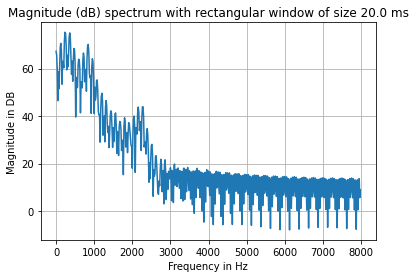

In [14]:
# Create rectangular window of 20ms
Fs = 16000
win_size = 20e-3
window = rect_window(win_size, Fs)
#Applying rectangular window at 2.5 sec and getting V[n]
# for Fs =16000 .25 seconds will come at .25*16000 = 4000 
V_n = y[4000:4000+window.shape[0]]* window
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with rectangular window of size {} ms'.format(win_size*1000))


Text(0.5, 1.0, 'Zoomed view of Magnitude spectrum with rectangular window of size 20.0 ms')

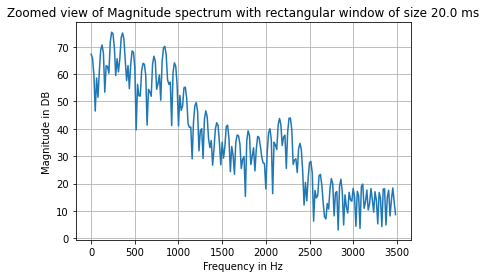

In [15]:
# Zooming out from 0:3500 for clearly seeing formants
f_f = freq_dft(3500)
plt.plot(freq[0:f_f],mag_vk[0:f_f])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Zoomed view of Magnitude spectrum with rectangular window of size {} ms'.format(win_size*1000))

In [16]:
# F0 between f1 = 0 Hz and f2 = 200 Hz
f1 = freq_dft(0)
f2 = freq_dft(200)
k = np.argmax(mag_vk[f1:f2])
F0  = freq[k]

new_row = {'DFT Length': dft_len, 'F0': 120, 'Window Type': 'Rectangular', 
                   'Window Length (ms)': win_size*1000, 'Observed F0': F0, 'F1': '-', 'F2': '-', 'F3': '-'}
df = df.append(new_row,ignore_index=True)

print('F0 obtained using a rectangular window length of {} ms are: '.format(win_size*1000))
print(' F0: {} Hz'.format(F0))


F0 obtained using a rectangular window length of 20.0 ms are: 
 F0: 125.0 Hz


#### Window Length = 40 ms

Text(0.5, 1.0, 'Magnitude (dB) spectrum with rectangular window of size 40.0 ms')

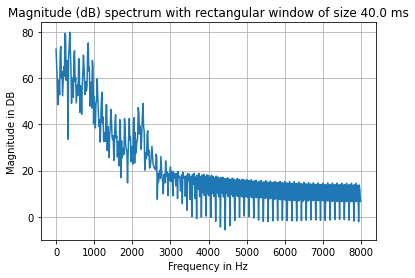

In [17]:
# Create rectangular window of 40ms
Fs = 16000
win_size = 40e-3
window = rect_window(win_size, Fs)
#Applying rectangular window at 2.5 sec and getting V[n]
# for Fs =16000 .25 seconds will come at .25*16000 = 4000 
V_n = y[4000:4000+window.shape[0]]* window
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with rectangular window of size {} ms'.format(win_size*1000))


Text(0.5, 1.0, 'Zoomed view of Magnitude spectrum with rectangular window of size 40.0 ms')

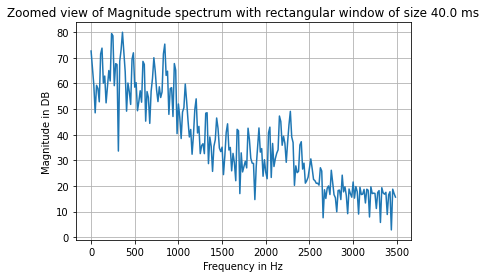

In [18]:
# Zooming out from 0:3500 for clearly seeing formants
f_f = freq_dft(3500)
plt.plot(freq[0:f_f],mag_vk[0:f_f])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Zoomed view of Magnitude spectrum with rectangular window of size {} ms'.format(win_size*1000))


In [19]:
# F0 between f1 = 0 Hz and f2 = 200 Hz
f1 = freq_dft(0)
f2 = freq_dft(200)
k = np.argmax(mag_vk[f1:f2])
F0  = freq[k]

new_row = {'DFT Length': dft_len, 'F0': 120, 'Window Type': 'Rectangular', 
                   'Window Length (ms)': win_size*1000, 'Observed F0': F0, 'F1': '-', 'F2': '-', 'F3': '-'}
df = df.append(new_row,ignore_index=True)

print('F0 obtained using a rectangular window length of {} ms are: '.format(win_size*1000))
print(' F0: {} Hz'.format(F0))


F0 obtained using a rectangular window length of 40.0 ms are: 
 F0: 125.0 Hz


###Hamming Window

In [20]:
def hamm_window(window_size, Fs):
  window_len = int(window_size*Fs)
  return(np.hamming(window_len))

#### Window Length = 5 ms

Text(0.5, 1.0, 'Magnitude (dB) spectrum with hamming window of size 5.0 ms')

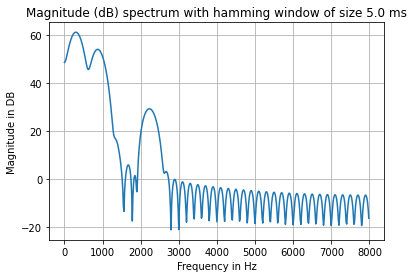

In [21]:
# Create rectangular window of 5ms
Fs = 16000
win_size = 5e-3
window = hamm_window(win_size, Fs)
#Applying rectangular window at 2.5 sec and getting V[n]
# for Fs =16000 .25 seconds will come at .25*16000 = 4000 
V_n = y[4000:4000+window.shape[0]]* window
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with hamming window of size {} ms'.format(win_size*1000))


Text(0.5, 1.0, 'Zoomed view of Magnitude spectrum with hamming window of size 5.0 ms')

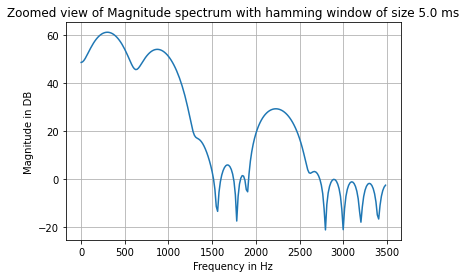

In [22]:
# Zooming out from 0:3500 for clearly seeing formants
f_f = freq_dft(3500)
plt.plot(freq[0:f_f],mag_vk[0:f_f])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Zoomed view of Magnitude spectrum with hamming window of size {} ms'.format(win_size*1000))

In [23]:
# First formant F1 = 0 Hz, F2 = 500 Hz
f1 = freq_dft(0)
f2 = freq_dft(500)
k = np.argmax(mag_vk[f1:f2])
formant1 = freq[k]

# Second Formant F1 = 500, F2 = 1000 Hz
f1 = freq_dft(500)
f2 = freq_dft(1000)
k = np.argmax(mag_vk[f1:f2])
formant2 = freq[k+f1]

# Third Formant F1 = 2000, F2 = 2500 Hz
f1 = freq_dft(2000)
f2 = freq_dft(2500)
k = np.argmax(mag_vk[f1:f2])
formant3 = freq[k+f1]

new_row = {'DFT Length': dft_len, 'F0': 120, 'Window Type': 'Hamming', 
                   'Window Length (ms)': win_size*1000, 'Observed F0': '-', 'F1': formant1, 'F2': formant2, 'F3': formant3}
df = df.append(new_row,ignore_index=True)

print('Formants obtained using a Hamming window of length {} ms are: '.format(win_size*1000))
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formant1,formant2,formant3))

Formants obtained using a Hamming window of length 5.0 ms are: 
 First Formant: 296.875 Hz 
 Second Formant: 875.0 Hz 
 Third Formant: 2234.375 Hz


#### Window Length = 10 ms

Text(0.5, 1.0, 'Magnitude (dB) spectrum with hamming window of size 10.0 ms')

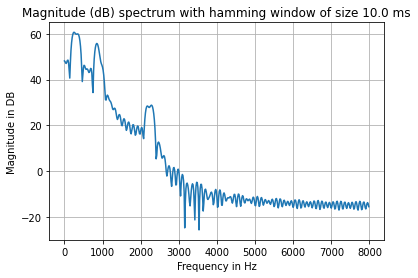

In [24]:
# Create rectangular window of 10ms
Fs = 16000
win_size = 10e-3
window = hamm_window(win_size, Fs)
#Applying rectangular window at 2.5 sec and getting V[n]
# for Fs =16000 .25 seconds will come at .25*16000 = 4000 
V_n = y[4000:4000+window.shape[0]]* window
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with hamming window of size {} ms'.format(win_size*1000))


Text(0.5, 1.0, 'Zoomed view of Magnitude spectrum with hamming window of size 10.0 ms')

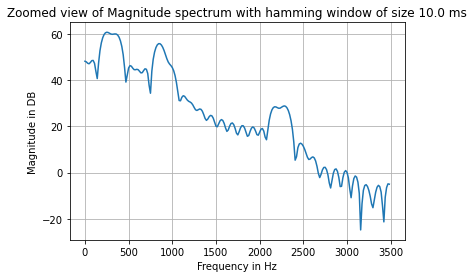

In [25]:
# Zooming out from 0:3500 for clearly seeing formants
f_f = freq_dft(3500)
plt.plot(freq[0:f_f],mag_vk[0:f_f])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Zoomed view of Magnitude spectrum with hamming window of size {} ms'.format(win_size*1000))

In [26]:
# First formant F1 = 0 Hz, F2 = 500 Hz
f1 = freq_dft(0)
f2 = freq_dft(500)
k = np.argmax(mag_vk[f1:f2])
formant1 = freq[k]

# Second Formant F1 = 500, F2 = 1000 Hz
f1 = freq_dft(500)
f2 = freq_dft(1000)
k = np.argmax(mag_vk[f1:f2])
formant2 = freq[k+f1]

# Third Formant F1 = 2000, F2 = 2500 Hz
f1 = freq_dft(2000)
f2 = freq_dft(2500)
k = np.argmax(mag_vk[f1:f2])
formant3 = freq[k+f1]

new_row = {'DFT Length': dft_len, 'F0': 120, 'Window Type': 'Hamming', 
                   'Window Length (ms)': win_size*1000, 'Observed F0': '-', 'F1': formant1, 'F2': formant2, 'F3': formant3}
df = df.append(new_row,ignore_index=True)

print('Formants obtained using a Hamming window of length {} ms are: '.format(win_size*1000))
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formant1,formant2,formant3))

Formants obtained using a Hamming window of length 10.0 ms are: 
 First Formant: 250.0 Hz 
 Second Formant: 843.75 Hz 
 Third Formant: 2281.25 Hz


#### Window Length = 20 ms

Text(0.5, 1.0, 'Magnitude (dB) spectrum with hamming window of size 20.0 ms')

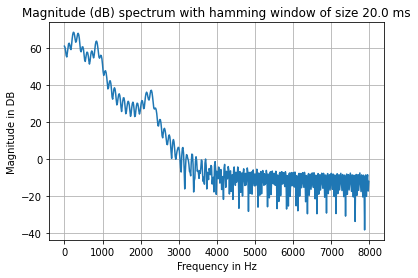

In [27]:
# Create rectangular window of 20ms
Fs = 16000
win_size = 20e-3
window = hamm_window(win_size, Fs)
#Applying rectangular window at 2.5 sec and getting V[n]
# for Fs =16000 .25 seconds will come at .25*16000 = 4000 
V_n = y[4000:4000+window.shape[0]]* window
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with hamming window of size {} ms'.format(win_size*1000))


Text(0.5, 1.0, 'Zoomed view of Magnitude spectrum with hamming window of size 20.0 ms')

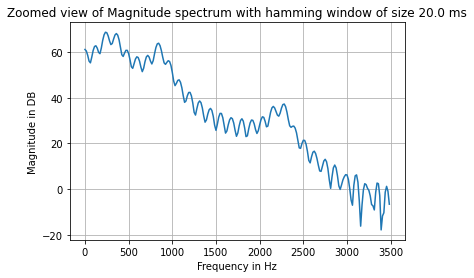

In [28]:
# Zooming out from 0:3500 for clearly seeing formants
f_f = freq_dft(3500)
plt.plot(freq[0:f_f],mag_vk[0:f_f])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Zoomed view of Magnitude spectrum with hamming window of size {} ms'.format(win_size*1000))

In [29]:
# F0 between f1 = 0 Hz and f2 = 200 Hz
f1 = freq_dft(0)
f2 = freq_dft(200)
k = np.argmax(mag_vk[f1:f2])
F0  = freq[k]

new_row = {'DFT Length': dft_len, 'F0': 120, 'Window Type': 'Hamming', 
                   'Window Length (ms)': win_size*1000, 'Observed F0': F0, 'F1': '-', 'F2': '-', 'F3': '-'}
df = df.append(new_row,ignore_index=True)

print('F0 obtained using a Hamming window length of {} ms are: '.format(win_size*1000))
print(' F0: {} Hz'.format(F0))


F0 obtained using a Hamming window length of 20.0 ms are: 
 F0: 125.0 Hz


#### Window Length = 40 ms

Text(0.5, 1.0, 'Magnitude (dB) spectrum with hamming window of size 40.0 ms')

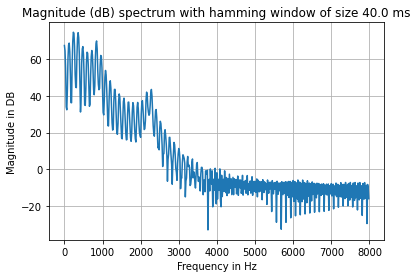

In [30]:
# Create rectangular window of 40ms
Fs = 16000
win_size = 40e-3
window = hamm_window(win_size, Fs)
#Applying rectangular window at 2.5 sec and getting V[n]
# for Fs =16000 .25 seconds will come at .25*16000 = 4000 
V_n = y[4000:4000+window.shape[0]]* window
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with hamming window of size {} ms'.format(win_size*1000))


Text(0.5, 1.0, 'Zoomed view of Magnitude spectrum with hamming window of size 40.0 ms')

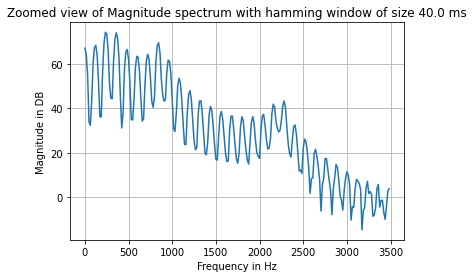

In [31]:
# Zooming out from 0:3500 for clearly seeing formants
f_f = freq_dft(3500)
plt.plot(freq[0:f_f],mag_vk[0:f_f])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Zoomed view of Magnitude spectrum with hamming window of size {} ms'.format(win_size*1000))


In [32]:
# F0 between f1 = 0 Hz and f2 = 200 Hz
f1 = freq_dft(0)
f2 = freq_dft(200)
k = np.argmax(mag_vk[f1:f2])
F0  = freq[k]

new_row = {'DFT Length': dft_len, 'F0': 120, 'Window Type': 'Hamming', 
                   'Window Length (ms)': win_size*1000, 'Observed F0': F0, 'F1': '-', 'F2': '-', 'F3': '-'}
df = df.append(new_row,ignore_index=True)

print('F0 obtained using a Hamming window length of {} ms are: '.format(win_size*1000))
print(' F0: {} Hz'.format(F0))


F0 obtained using a Hamming window length of 40.0 ms are: 
 F0: 125.0 Hz


##$F_0 = 220 Hz$

###Generation of Speech signal


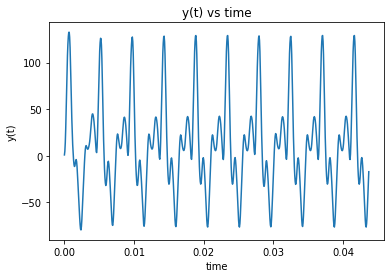

In [33]:
# x[n] 
# F0 = 220
F0 = 220
# Fs = 16000
Fs = 16000
# Finding the samples x[n]
# for 0.5 sec
x_n = np.zeros(int(0.5*Fs))
# delta_t = 1/Fs
x_n = source(Fs, F0, 1/Fs, 0.5)
# Making all impulses amplitude as 1 because that is what we will get after 
# sampling narrow rectangular pulse
#x_n = np.where(x_n>0,1,0)
# Defining n 
n = np.arange(0,x_n.shape[0])

# Applying Filter:
# First formant:
F1 = 300
Bi = 100  # Same Bi for all sections
y1 = response(x_n,F1,Bi,Fs)

# Second Formant:
F2 = 870
Bi = 100 
y2 = response(y1,F2,Bi,Fs)

# Third formant
F3 = 2240
Bi = 100  
y = response(y2,F3,Bi,Fs)

# Plotting y[n] for few pitches
plot_x = n[:700]/Fs
plot_y = y[:700]
plt.plot(plot_x,plot_y)
plt.xlabel('time')
plt.ylabel('y(t)')
plt.title('y(t) vs time')
plt.show()


###Rectangular Window

#### Window Length = 5 ms

Text(0.5, 1.0, 'Magnitude (dB) spectrum with rectangular window of size 5.0 ms')

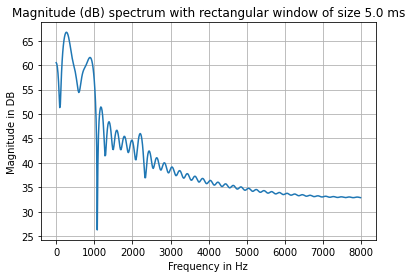

In [34]:
# Create rectangular window of 5ms
Fs = 16000
win_size = 5e-3
window = rect_window(win_size, Fs)
#Applying rectangular window at 2.5 sec and getting V[n]
# for Fs =16000 .25 seconds will come at .25*16000 = 4000 
V_n = y[4000:4000+window.shape[0]]* window
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with rectangular window of size {} ms'.format(win_size*1000))


Text(0.5, 1.0, 'Zoomed view of Magnitude spectrum with rectangular window of size 5.0 ms')

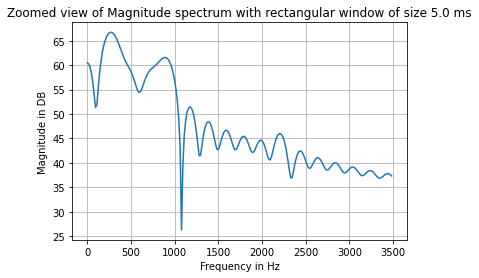

In [35]:
# Zooming out from 0:3500 for clearly seeing formants
f_f = freq_dft(3500)
plt.plot(freq[0:f_f],mag_vk[0:f_f])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Zoomed view of Magnitude spectrum with rectangular window of size {} ms'.format(win_size*1000))

In [36]:
# First formant F1 = 0 Hz, F2 = 500 Hz
f1 = freq_dft(0)
f2 = freq_dft(500)
k = np.argmax(mag_vk[f1:f2])
formant1 = freq[k]

# Second Formant F1 = 500, F2 = 1000 Hz
f1 = freq_dft(500)
f2 = freq_dft(1000)
k = np.argmax(mag_vk[f1:f2])
formant2 = freq[k+f1]

# Third Formant F1 = 2000, F2 = 2500 Hz
f1 = freq_dft(2000)
f2 = freq_dft(2500)
k = np.argmax(mag_vk[f1:f2])
formant3 = freq[k+f1]

new_row = {'DFT Length': dft_len, 'F0': 220, 'Window Type': 'Rectangular', 
                   'Window Length (ms)': win_size*1000, 'Observed F0': '-', 'F1': formant1, 'F2': formant2, 'F3': formant3}
df = df.append(new_row,ignore_index=True)

print('Formants obtained using a window length of {} ms are: '.format(win_size*1000))
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formant1,formant2,formant3))

Formants obtained using a window length of 5.0 ms are: 
 First Formant: 265.625 Hz 
 Second Formant: 890.625 Hz 
 Third Formant: 2203.125 Hz


#### Window Length = 10 ms

Text(0.5, 1.0, 'Magnitude (dB) spectrum with rectangular window of size 10.0 ms')

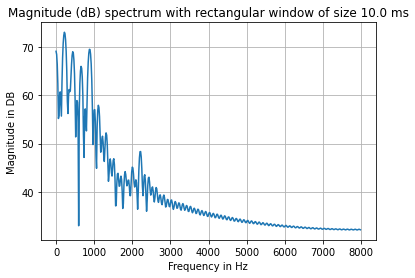

In [37]:
# Create rectangular window of 10ms
Fs = 16000
win_size = 10e-3
window = rect_window(win_size, Fs)
#Applying rectangular window at 2.5 sec and getting V[n]
# for Fs =16000 .25 seconds will come at .25*16000 = 4000 
V_n = y[4000:4000+window.shape[0]]* window
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with rectangular window of size {} ms'.format(win_size*1000))


Text(0.5, 1.0, 'Zoomed view of Magnitude spectrum with rectangular window of size 10.0 ms')

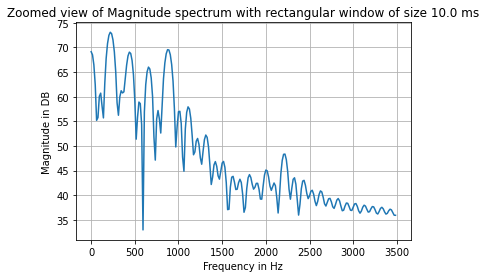

In [38]:
# Zooming out from 0:3500 for clearly seeing formants
f_f = freq_dft(3500)
plt.plot(freq[0:f_f],mag_vk[0:f_f])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Zoomed view of Magnitude spectrum with rectangular window of size {} ms'.format(win_size*1000))

In [39]:
# First formant F1 = 0 Hz, F2 = 500 Hz
f1 = freq_dft(0)
f2 = freq_dft(500)
k = np.argmax(mag_vk[f1:f2])
formant1 = freq[k]

# Second Formant F1 = 500, F2 = 1000 Hz
f1 = freq_dft(500)
f2 = freq_dft(1000)
k = np.argmax(mag_vk[f1:f2])
formant2 = freq[k+f1]

# Third Formant F1 = 2000, F2 = 2500 Hz
f1 = freq_dft(2000)
f2 = freq_dft(2500)
k = np.argmax(mag_vk[f1:f2])
formant3 = freq[k+f1]

new_row = {'DFT Length': dft_len, 'F0': 220, 'Window Type': 'Rectangular', 
                   'Window Length (ms)': win_size*1000, 'Observed F0': '-', 'F1': formant1, 'F2': formant2, 'F3': formant3}
df = df.append(new_row,ignore_index=True)

print('Formants obtained using a window length of {} ms are: '.format(win_size*1000))
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formant1,formant2,formant3))

Formants obtained using a window length of 10.0 ms are: 
 First Formant: 218.75 Hz 
 Second Formant: 875.0 Hz 
 Third Formant: 2218.75 Hz


#### Window Length = 20 ms

Text(0.5, 1.0, 'Magnitude (dB) spectrum with rectangular window of size 20.0 ms')

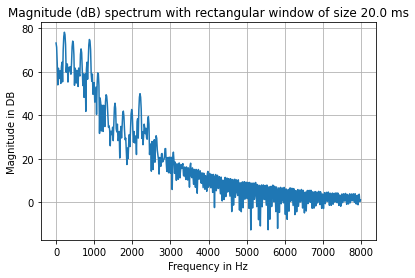

In [40]:
# Create rectangular window of 20ms
Fs = 16000
win_size = 20e-3
window = rect_window(win_size, Fs)
#Applying rectangular window at 2.5 sec and getting V[n]
# for Fs =16000 .25 seconds will come at .25*16000 = 4000 
V_n = y[4000:4000+window.shape[0]]* window
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with rectangular window of size {} ms'.format(win_size*1000))


Text(0.5, 1.0, 'Zoomed view of Magnitude spectrum with rectangular window of size 20.0 ms')

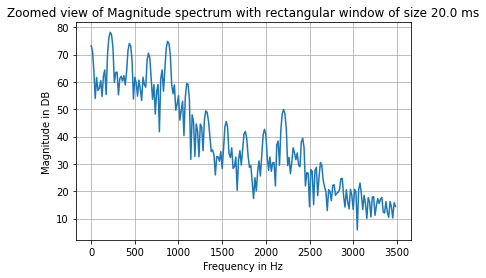

In [41]:
# Zooming out from 0:3500 for clearly seeing formants
f_f = freq_dft(3500)
plt.plot(freq[0:f_f],mag_vk[0:f_f])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Zoomed view of Magnitude spectrum with rectangular window of size {} ms'.format(win_size*1000))

In [42]:
# F0 between f1 = 0 Hz and f2 = 400 Hz
f1 = freq_dft(0)
f2 = freq_dft(400)
k = np.argmax(mag_vk[f1:f2])
F0  = freq[k]

new_row = {'DFT Length': dft_len, 'F0': 220, 'Window Type': 'Rectangular', 
                   'Window Length (ms)': win_size*1000, 'Observed F0': F0, 'F1': '-', 'F2': '-', 'F3': '-'}
df = df.append(new_row,ignore_index=True)

print('F0 obtained using a rectangular window length of {} ms are: '.format(win_size*1000))
print(' F0: {} Hz'.format(F0))


F0 obtained using a rectangular window length of 20.0 ms are: 
 F0: 218.75 Hz


#### Window Length = 40 ms

Text(0.5, 1.0, 'Magnitude (dB) spectrum with rectangular window of size 40.0 ms')

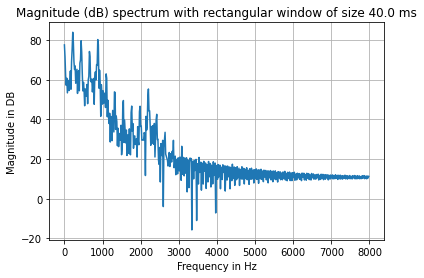

In [43]:
# Create rectangular window of 40ms
Fs = 16000
win_size = 40e-3
window = rect_window(win_size, Fs)
#Applying rectangular window at 2.5 sec and getting V[n]
# for Fs =16000 .25 seconds will come at .25*16000 = 4000 
V_n = y[4000:4000+window.shape[0]]* window
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with rectangular window of size {} ms'.format(win_size*1000))


Text(0.5, 1.0, 'Zoomed view of Magnitude spectrum with rectangular window of size 40.0 ms')

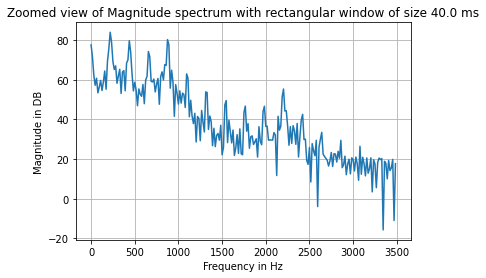

In [44]:
# Zooming out from 0:3500 for clearly seeing formants
f_f = freq_dft(3500)
plt.plot(freq[0:f_f],mag_vk[0:f_f])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Zoomed view of Magnitude spectrum with rectangular window of size {} ms'.format(win_size*1000))

In [45]:
# F0 between f1 = 0 Hz and f2 = 400 Hz
f1 = freq_dft(0)
f2 = freq_dft(400)
k = np.argmax(mag_vk[f1:f2])
F0  = freq[k]

new_row = {'DFT Length': dft_len, 'F0': 220, 'Window Type': 'Rectangular', 
                   'Window Length (ms)': win_size*1000, 'Observed F0': F0, 'F1': '-', 'F2': '-', 'F3': '-'}
df = df.append(new_row,ignore_index=True)

print('F0 obtained using a rectangular window length of {} ms are: '.format(win_size*1000))
print(' F0: {} Hz'.format(F0))


F0 obtained using a rectangular window length of 40.0 ms are: 
 F0: 218.75 Hz


###Hamming Window

#### Window Length = 5 ms

Text(0.5, 1.0, 'Magnitude (dB) spectrum with hamming window of size 5.0 ms')

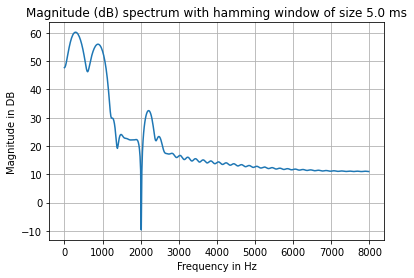

In [46]:
# Create rectangular window of 5ms
Fs = 16000
win_size = 5e-3
window = hamm_window(win_size, Fs)
#Applying rectangular window at 2.5 sec and getting V[n]
# for Fs =16000 .25 seconds will come at .25*16000 = 4000 
V_n = y[4000:4000+window.shape[0]]* window
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with hamming window of size {} ms'.format(win_size*1000))


Text(0.5, 1.0, 'Zoomed view of Magnitude spectrum with hamming window of size 5.0 ms')

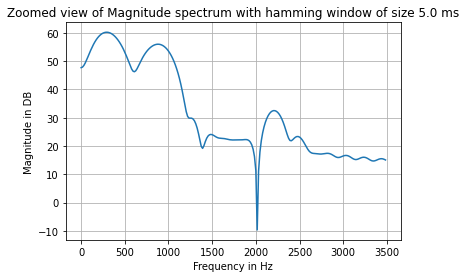

In [47]:
# Zooming out from 0:3500 for clearly seeing formants
f_f = freq_dft(3500)
plt.plot(freq[0:f_f],mag_vk[0:f_f])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Zoomed view of Magnitude spectrum with hamming window of size {} ms'.format(win_size*1000))

In [48]:
# First formant F1 = 0 Hz, F2 = 500 Hz
f1 = freq_dft(0)
f2 = freq_dft(500)
k = np.argmax(mag_vk[f1:f2])
formant1 = freq[k]

# Second Formant F1 = 500, F2 = 1000 Hz
f1 = freq_dft(500)
f2 = freq_dft(1000)
k = np.argmax(mag_vk[f1:f2])
formant2 = freq[k+f1]

# Third Formant F1 = 2000, F2 = 2500 Hz
f1 = freq_dft(2000)
f2 = freq_dft(2500)
k = np.argmax(mag_vk[f1:f2])
formant3 = freq[k+f1]

new_row = {'DFT Length': dft_len, 'F0': 220, 'Window Type': 'Hamming', 
                   'Window Length (ms)': win_size*1000, 'Observed F0': '-', 'F1': formant1, 'F2': formant2, 'F3': formant3}
df = df.append(new_row,ignore_index=True)

print('Formants obtained using a Hamming window of length {} ms are: '.format(win_size*1000))
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formant1,formant2,formant3))

Formants obtained using a Hamming window of length 5.0 ms are: 
 First Formant: 296.875 Hz 
 Second Formant: 875.0 Hz 
 Third Formant: 2203.125 Hz


#### Window Length = 10 ms

Text(0.5, 1.0, 'Magnitude (dB) spectrum with hamming window of size 10.0 ms')

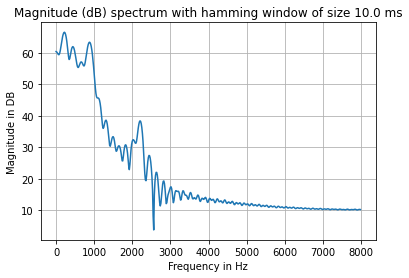

In [49]:
# Create rectangular window of 10ms
Fs = 16000
win_size = 10e-3
window = hamm_window(win_size, Fs)
#Applying rectangular window at 2.5 sec and getting V[n]
# for Fs =16000 .25 seconds will come at .25*16000 = 4000 
V_n = y[4000:4000+window.shape[0]]* window
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with hamming window of size {} ms'.format(win_size*1000))


Text(0.5, 1.0, 'Zoomed view of Magnitude spectrum with hamming window of size 10.0 ms')

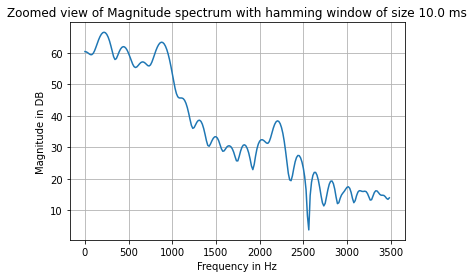

In [50]:
# Zooming out from 0:3500 for clearly seeing formants
f_f = freq_dft(3500)
plt.plot(freq[0:f_f],mag_vk[0:f_f])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Zoomed view of Magnitude spectrum with hamming window of size {} ms'.format(win_size*1000))

In [51]:
# First formant F1 = 0 Hz, F2 = 500 Hz
f1 = freq_dft(0)
f2 = freq_dft(500)
k = np.argmax(mag_vk[f1:f2])
formant1 = freq[k]

# Second Formant F1 = 500, F2 = 1000 Hz
f1 = freq_dft(500)
f2 = freq_dft(1000)
k = np.argmax(mag_vk[f1:f2])
formant2 = freq[k+f1]

# Third Formant F1 = 2000, F2 = 2500 Hz
f1 = freq_dft(2000)
f2 = freq_dft(2500)
k = np.argmax(mag_vk[f1:f2])
formant3 = freq[k+f1]

new_row = {'DFT Length': dft_len, 'F0': 220, 'Window Type': 'Hamming', 
                   'Window Length (ms)': win_size*1000, 'Observed F0': '-', 'F1': formant1, 'F2': formant2, 'F3': formant3}
df = df.append(new_row,ignore_index=True)

print('Formants obtained using a Hamming window of length {} ms are: '.format(win_size*1000))
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formant1,formant2,formant3))

Formants obtained using a Hamming window of length 10.0 ms are: 
 First Formant: 218.75 Hz 
 Second Formant: 875.0 Hz 
 Third Formant: 2203.125 Hz


#### Window Length = 20 ms

Text(0.5, 1.0, 'Magnitude (dB) spectrum with hamming window of size 20.0 ms')

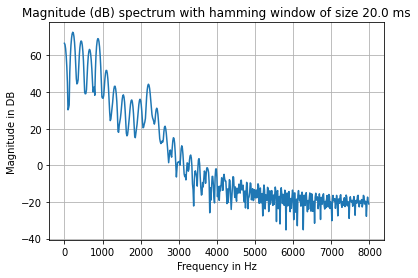

In [52]:
# Create rectangular window of 20ms
Fs = 16000
win_size = 20e-3
window = hamm_window(win_size, Fs)
#Applying rectangular window at 2.5 sec and getting V[n]
# for Fs =16000 .25 seconds will come at .25*16000 = 4000 
V_n = y[4000:4000+window.shape[0]]* window
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with hamming window of size {} ms'.format(win_size*1000))


Text(0.5, 1.0, 'Zoomed view of Magnitude spectrum with hamming window of size 20.0 ms')

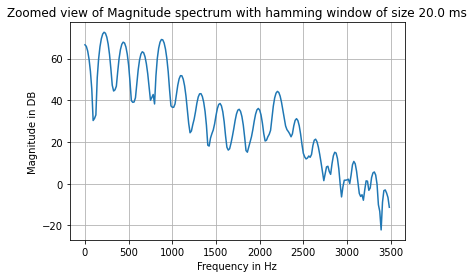

In [53]:
# Zooming out from 0:3500 for clearly seeing formants
f_f = freq_dft(3500)
plt.plot(freq[0:f_f],mag_vk[0:f_f])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Zoomed view of Magnitude spectrum with hamming window of size {} ms'.format(win_size*1000))

In [54]:
# F0 between f1 = 0 Hz and f2 = 400 Hz
f1 = freq_dft(0)
f2 = freq_dft(400)
k = np.argmax(mag_vk[f1:f2])
F0  = freq[k]

new_row = {'DFT Length': dft_len, 'F0': 220, 'Window Type': 'Hamming', 
                   'Window Length (ms)': win_size*1000, 'Observed F0': F0, 'F1': '-', 'F2': '-', 'F3': '-'}
df = df.append(new_row,ignore_index=True)

print('F0 obtained using a Hamming window length of {} ms are: '.format(win_size*1000))
print(' F0: {} Hz'.format(F0))


F0 obtained using a Hamming window length of 20.0 ms are: 
 F0: 218.75 Hz


#### Window Length = 40 ms

Text(0.5, 1.0, 'Magnitude (dB) spectrum with hamming window of size 40.0 ms')

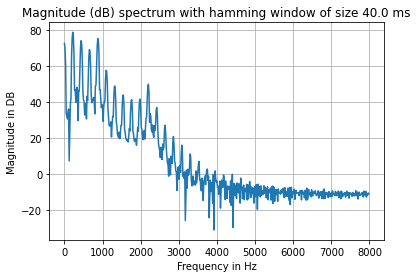

In [55]:
# Create rectangular window of 40ms
Fs = 16000
win_size = 40e-3
window = hamm_window(win_size, Fs)
#Applying rectangular window at 2.5 sec and getting V[n]
# for Fs =16000 .25 seconds will come at .25*16000 = 4000 
V_n = y[4000:4000+window.shape[0]]* window
# DFT length = 1024
dft_len = 1024
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with hamming window of size {} ms'.format(win_size*1000))


Text(0.5, 1.0, 'Zoomed view of Magnitude spectrum with hamming window of size 40.0 ms')

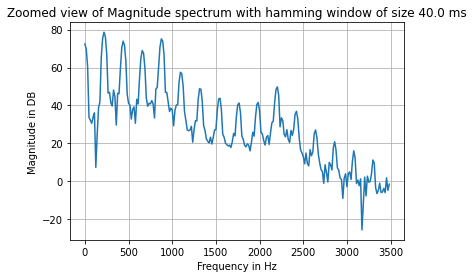

In [56]:
# Zooming out from 0:3500 for clearly seeing formants
f_f = freq_dft(3500)
plt.plot(freq[0:f_f],mag_vk[0:f_f])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Zoomed view of Magnitude spectrum with hamming window of size {} ms'.format(win_size*1000))

In [57]:
# F0 between f1 = 0 Hz and f2 = 400 Hz
f1 = freq_dft(0)
f2 = freq_dft(400)
k = np.argmax(mag_vk[f1:f2])
F0  = freq[k]

new_row = {'DFT Length': dft_len, 'F0': 220, 'Window Type': 'Hamming', 
                   'Window Length (ms)': win_size*1000, 'Observed F0': F0, 'F1': '-', 'F2': '-', 'F3': '-'}
df = df.append(new_row,ignore_index=True)

print('F0 obtained using a Hamming window length of {} ms are: '.format(win_size*1000))
print(' F0: {} Hz'.format(F0))


F0 obtained using a Hamming window length of 40.0 ms are: 
 F0: 218.75 Hz


## Increasing DFT length

###Rectangular Window


#### Window Length = 5 ms

Text(0.5, 1.0, 'Magnitude (dB) spectrum with rectangular window of size 5.0 ms')

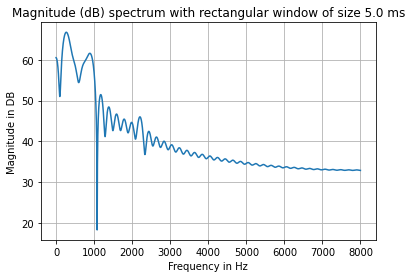

In [58]:
# Create rectangular window of 5ms
Fs = 16000
win_size = 5e-3
# DFT length = 8192
dft_len = 8192
window = rect_window(win_size, Fs)
#Applying rectangular window at 2.5 sec and getting V[n]
# for Fs =16000 .25 seconds will come at .25*16000 = 4000 
V_n = y[4000:4000+window.shape[0]]* window
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with rectangular window of size {} ms'.format(win_size*1000))


Text(0.5, 1.0, 'Zoomed view of Magnitude spectrum with rectangular window of size 5.0 ms')

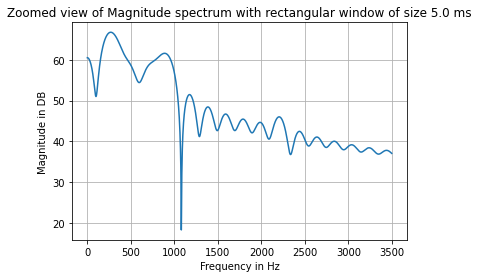

In [59]:
# Zooming out from 0:3500 for clearly seeing formants
f_f = freq_dft(3500,dft_len = 8192)
plt.plot(freq[0:f_f],mag_vk[0:f_f])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Zoomed view of Magnitude spectrum with rectangular window of size {} ms'.format(win_size*1000))

In [60]:
# First formant F1 = 0 Hz, F2 = 500 Hz
f1 = freq_dft(0,dft_len = 8192)
f2 = freq_dft(500,dft_len = 8192)
k = np.argmax(mag_vk[f1:f2])
formant1 = freq[k]

# Second Formant F1 = 500, F2 = 1000 Hz
f1 = freq_dft(500,dft_len = 8192)
f2 = freq_dft(1000,dft_len = 8192)
k = np.argmax(mag_vk[f1:f2])
formant2 = freq[k+f1]

# Third Formant F1 = 2000, F2 = 2500 Hz
f1 = freq_dft(2000,dft_len = 8192)
f2 = freq_dft(2500,dft_len = 8192)
k = np.argmax(mag_vk[f1:f2])
formant3 = freq[k+f1]

new_row = {'DFT Length': dft_len, 'F0': 220, 'Window Type': 'Rectangular', 
                   'Window Length (ms)': win_size*1000, 'Observed F0': '-', 'F1': formant1, 'F2': formant2, 'F3': formant3}
df = df.append(new_row,ignore_index=True)

print('Formants obtained using a window length of {} ms are: '.format(win_size*1000))
print(' First Formant: {} Hz \n Second Formant: {} Hz \n Third Formant: {} Hz'.format(formant1,formant2,formant3))

Formants obtained using a window length of 5.0 ms are: 
 First Formant: 269.53125 Hz 
 Second Formant: 888.671875 Hz 
 Third Formant: 2205.078125 Hz


#### Window Length = 40 ms

Text(0.5, 1.0, 'Magnitude (dB) spectrum with rectangular window of size 40.0 ms')

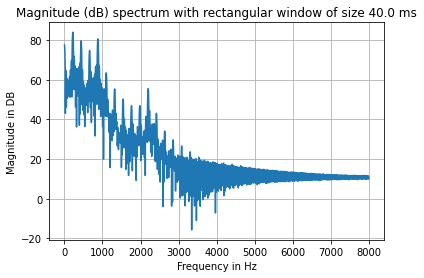

In [61]:
# Create rectangular window of 40ms
Fs = 16000
win_size = 40e-3
window = rect_window(win_size, Fs)
#Applying rectangular window at 2.5 sec and getting V[n]
# for Fs =16000 .25 seconds will come at .25*16000 = 4000 
V_n = y[4000:4000+window.shape[0]]* window
# DFT length = 8192
dft_len = 8192
# Using numpy FFT to compute DFT
V_k = np.fft.fft(V_n, n=dft_len)
# Frequency for plotting
freq = np.fft.fftfreq(V_k.shape[-1], 1/Fs)
# Plot the db magnitude vs frequency in Hz
zerro = dft_len//2
mag_vk = 20*np.log10(np.abs(V_k))
plt.plot(freq[0:zerro],mag_vk[0:zerro])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Magnitude (dB) spectrum with rectangular window of size {} ms'.format(win_size*1000))


Text(0.5, 1.0, 'Zoomed view of Magnitude spectrum with rectangular window of size 40.0 ms')

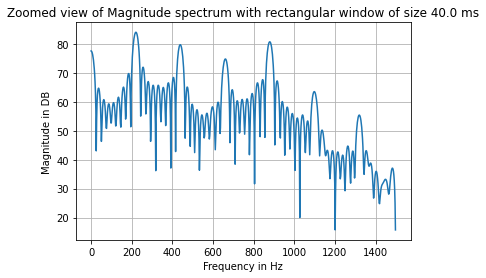

In [62]:
# Zooming out from 0:1500 for clearly seeing formants
f_f = freq_dft(1500,dft_len = 8192)
plt.plot(freq[0:f_f],mag_vk[0:f_f])
plt.grid()
plt.xlabel('Frequency in Hz')
plt.ylabel('Magnitude in DB')
plt.title('Zoomed view of Magnitude spectrum with rectangular window of size {} ms'.format(win_size*1000))


In [63]:
# F0 between f1 = 0 Hz and f2 = 400 Hz
f1 = freq_dft(0,dft_len = 8192)
f2 = freq_dft(400,dft_len = 8192)
k = np.argmax(mag_vk[f1:f2])
F0  = freq[k]

new_row = {'DFT Length': dft_len, 'F0': 220, 'Window Type': 'Rectangular', 
                   'Window Length (ms)': win_size*1000, 'Observed F0': F0, 'F1': '-', 'F2': '-', 'F3': '-'}
df = df.append(new_row,ignore_index=True)

print('F0 obtained using a rectangular window length of {} ms are: '.format(win_size*1000))
print(' F0: {} Hz'.format(F0))


F0 obtained using a rectangular window length of 40.0 ms are: 
 F0: 220.703125 Hz


##Observations

### Calculating Error

In [64]:
# Adding the Error Columns
E_F0 = np.zeros(df.shape[0],dtype = '<U25')
E_F1 = np.zeros(df.shape[0],dtype = '<U25')
E_F2 = np.zeros(df.shape[0],dtype = '<U25')
E_F3 = np.zeros(df.shape[0],dtype = '<U25')
j=0

for _,dd in df.iterrows():
  if(dd['Observed F0'] == '-'):
    E_F0[j] = '- '
    E_F1[j] = str(np.abs(dd['F1'] - 300))
    E_F2[j] = str(np.abs(dd['F2'] - 870))
    E_F3[j] = str(np.abs(dd['F3'] - 2240))
  else:
    if dd['F0']==120:
      E_F0[j] = str(np.abs(dd['Observed F0'] - 120))
    else:
      E_F0[j] = str(np.abs(dd['Observed F0'] - 220))
    E_F1[j] = '- '
    E_F2[j] = '- '
    E_F3[j] = '- '
  j=j+1
df['Error_F0'] = E_F0
df['Error_F1'] = E_F1
df['Error_F2'] = E_F2
df['Error_F3'] = E_F3

df= df.rename(columns={"F0": "F0 (Hz)", "Observed F0": "Observed F0 (Hz)", "F1": "F1 (Hz)", "F2": "F2 (Hz)", "F3": "F3 (Hz)",
                    "Error_F0" : "Error_F0 (Hz)",	"Error_F1":	"Error_F1 (Hz)",	"Error_F2":	"Error_F2 (Hz)",	"Error_F3":	"Error_F3 (Hz)"})


### Display in tabular form

In [65]:
pd.set_option('display.max_rows', df.shape[0]+1)
df

DFT Length  F0 (Hz)  Window Type  ...  Error_F1 (Hz) Error_F2 (Hz) Error_F3 (Hz)
0         1024      120  Rectangular  ...          3.125         26.25        68.125
1         1024      120  Rectangular  ...         65.625         26.25        68.125
2         1024      120  Rectangular  ...             -             -             - 
3         1024      120  Rectangular  ...             -             -             - 
4         1024      120      Hamming  ...          3.125           5.0         5.625
5         1024      120      Hamming  ...           50.0         26.25         41.25
6         1024      120      Hamming  ...             -             -             - 
7         1024      120      Hamming  ...             -             -             - 
8         1024      220  Rectangular  ...         34.375        20.625        36.875
9         1024      220  Rectangular  ...          81.25           5.0         21.25
10        1024      220  Rectangular  ...             -             -             - 
11        1024      220  Rectangular  ...             -             -             - 
12        1024      220      Hamming  ...          3.125           5.0        36.875
13        1024      220      Hamming  ...          81.25           5.0        36.875
14        1024      220      Hamming  ...             -             -             - 
15        1024      220      Hamming  ...             -             -             - 
16        8192      220  Rectangular  ...       30.46875     18.671875     34.921875
17        8192      220  Rectangular  ...             -             -             - 

[18 rows x 12 columns]

### Discussions

General Observations:
1. DC component was observed in frequency spectra. In recorded sounds we will not see the DC components because recorder makes the DC component to zero. However, we have used synthesized vowel for this analysis whose DC component is not zero and that is getting reflected here.
2. The reason we are doing our analysis on synthesized sounds is that now we know the ground truth values and we can compared our calculated values with ground truth values to find the errors.
3. According to me calculated F0, F1, F2 and F3 was acceptable.

Effect of Change of Window length:
* Small Window:
 1. When we used small window all the lobes of sinc function were merged in frequeny spectra and we observed a magnitude spectrum where formant locations were clearly identifiable. However, calculating the F0 or any other harmonics was not possible using this analysis.
 2. That is why this method was used to find the Formant locations. Exact formant locations are found by finding the local maxima around the formant locations.
 3. When we used smaller window size (5 ms) then the error in calculating the F1 that is first formant frequency was less in comparison when we used a slight large window size(10 ms)
 4. Error in calculating F2 and F3 that is first and second formants that are at higher frequeny locations, 10 ms window size did better job than 5ms window size. This is said based on the observed error by using different window size.

* Large Window:
 1. When we used large window, the width of lobes decreased (width of lobes in case of recftangular window = $4\pi/L$ where, L is window length) and the harmonics were more clearly visible here. However, if we try to calculate formant locations here we might high errors because there is no sample now at formant locations that is lobes are now narrower.
 2. That is why this method is used for finding the F0. Exact location is found by taking the location of first maxima. Analogy used in this method is that only harmonics locations have high vaulues and even when our DFT does not have a value of k exactly at the locations of harmonis, it will be near to that.
 3. When we used a little small window size (20 ms) the harmonics are visible along with few side lobes but when we used a window size even higher that is 40 ms then we can see harmonics more clearly and the side lobes are also more clearly visible. One reason for this might be that: we do not have any magnitude in between harmonics, and when we use narrow lobes that is large window size then we might see the lobes and sidelobes more clearly.
 4. Not much of a change in error in caclulating F0 was observed by using different window length i.e. 20 and 40 ms.

Effect of change of Window Type:
 1. One observation that can be made is that the lobes are more wider looking in hamming window than rectangular window. We expect this theoritically also because the lobes width of hamming window is twice than that of rectangular window.
 2. Also the number of lobes observed in hamming window were less than that of rectangular window.
 3. Also it is observed that errors in calculating the parameters are less in hamming window than rectangular window.
 4. When a large window size (40 ms) was used then we also observed that the difference between main lobe magnitudes and side lobe magnitudes was more in hamming window in comparison with the retangular window.

Effect of Change in F0:
1. When we used low pitched sound (120 Hz) for analysis, we observed more number of harmonics when we used large window size than the high pitched sound (220 Hz). Also we observed that the narrow lobes were more apart in frequency in  high pitched signal than in low pitched signal when narrow band analysis was used.
2. Small change in highest magnitude was observed, 220 Hz signal had a little bit less magnitude than that of 120 Hz signal. This could be because the magnitude in frequency in related to the time period.
3. Formants are more better visible in low pitched sound than high pitched sound. Lower frequeny formant F1 and F2 are visible in both the spectrum but when we go to the higher freuency spectrum F3 then it is berrer visible in low pitched sound.
4. Error in finding the F0 is found to be less in 220 Hz signal than 120 Hz signal. I think lower and higher pitch has nothing to do with this but the number of DFT samples played a role in this. 120 Hz signal might be more apart from the sampled value of DFT than 220 Hz signal.
5. In real life speech when pich is increased, generally the formant locations also increases like F1 will change to some other value higher than F1 before. However, we are using a synthesized sound where we are not varying formant locations with pitch so we did not observe that phenomena here.

Effect of changing the DFT size.
1. DFT size was increased to 8192 for getting this analysis.
2. When DFT size was increased Errors in parameters was decreased but not zero.
3. Decrease in error might be because of the same reason stated above that is frequency getting more closer to the samples now.



